In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supplement-sales-data/Supplement_Sales_Weekly_Expanded.csv


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

In [55]:
df=pd.read_csv("/kaggle/input/supplement-sales-data/Supplement_Sales_Weekly_Expanded.csv")

# Set Seaborn theme for better visuals
sns.set_theme(style="whitegrid")

In [56]:
df

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb
...,...,...,...,...,...,...,...,...,...,...
4379,2025-03-31,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [58]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [59]:
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

In [60]:
print(df.isnull().sum())

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64


In [61]:
df['Net Revenue'] = df['Revenue'] * (1 - df['Discount'])

In [62]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
 10  Net Revenue     4384 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 376.9+ KB
None
                      Date   Units Sold        Price       Revenue  \
count                 4384  4384.000000  4384.000000   4384

In [63]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)

In [64]:
monthly_sales = df.groupby('Month')['Revenue'].sum().reset_index()

In [65]:
category_sales = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).reset_index()
category_sales

,Category,Revenue
0,Vitamin,4300224.68
1,Mineral,4276107.99
2,Performance,2909702.18
3,Protein,2855492.09
4,Amino Acid,1464819.63
5,Omega,1451065.87
6,Fat Burner,1440900.05
7,Hydration,1411951.38
8,Herbal,1405700.79
9,Sleep Aid,1397315.79


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


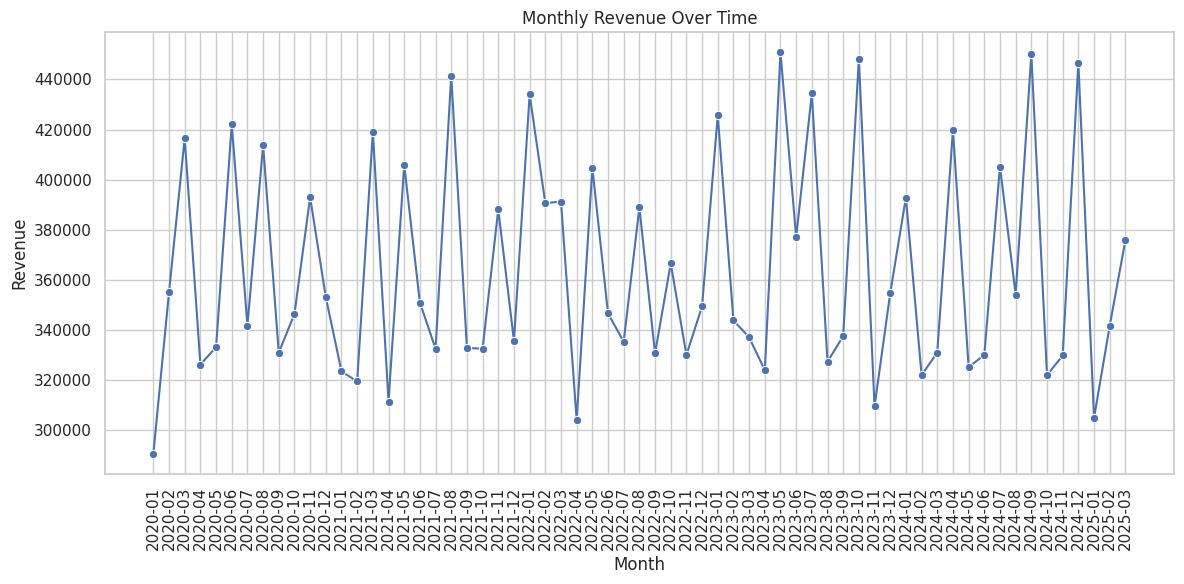

In [66]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Revenue', marker='o')
plt.title("Monthly Revenue Over Time")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

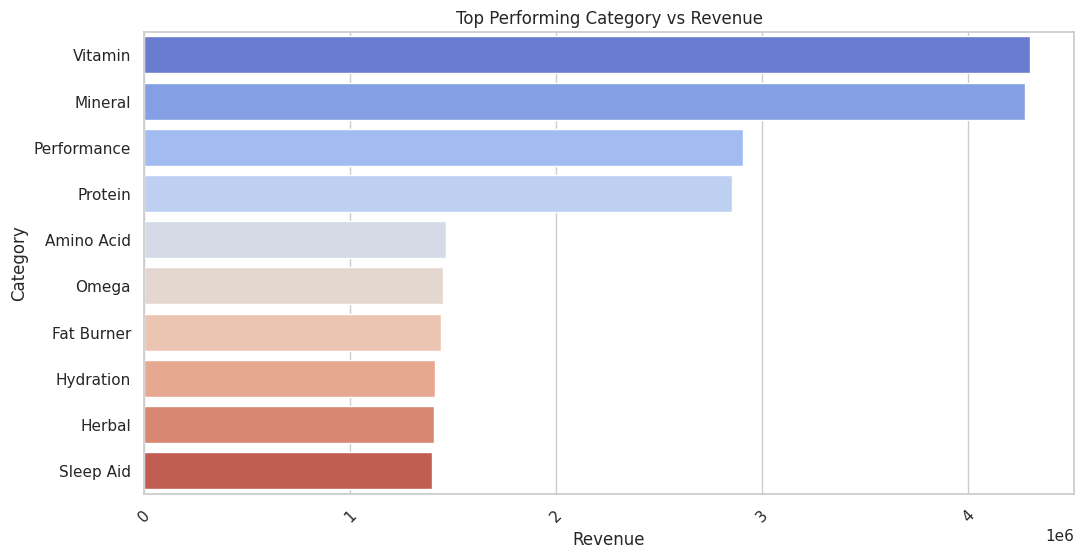

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(data=category_sales, x='Revenue', y='Category', palette='coolwarm')
plt.title("Top Performing Category vs Revenue")
plt.xticks(rotation=45)
plt.show()

In [68]:
platform_Sales = df.groupby('Platform')['Revenue'].sum().sort_values(ascending=False).reset_index()
platform_Sales

,Platform,Revenue
0,iHerb,7855261.05
1,Amazon,7669451.78
2,Walmart,7388567.62


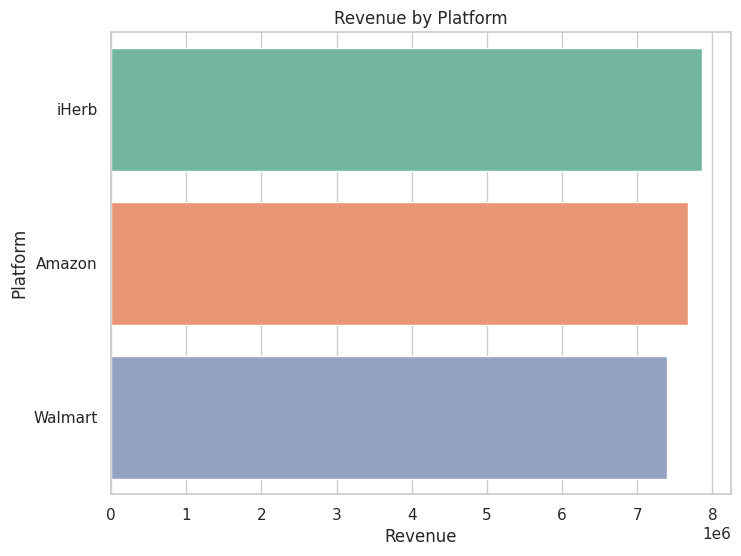

In [69]:
plt.figure(figsize=(8, 6))
sns.barplot(data=platform_Sales, x='Revenue', y='Platform', palette='Set2')
plt.title("Revenue by Platform")
plt.show()

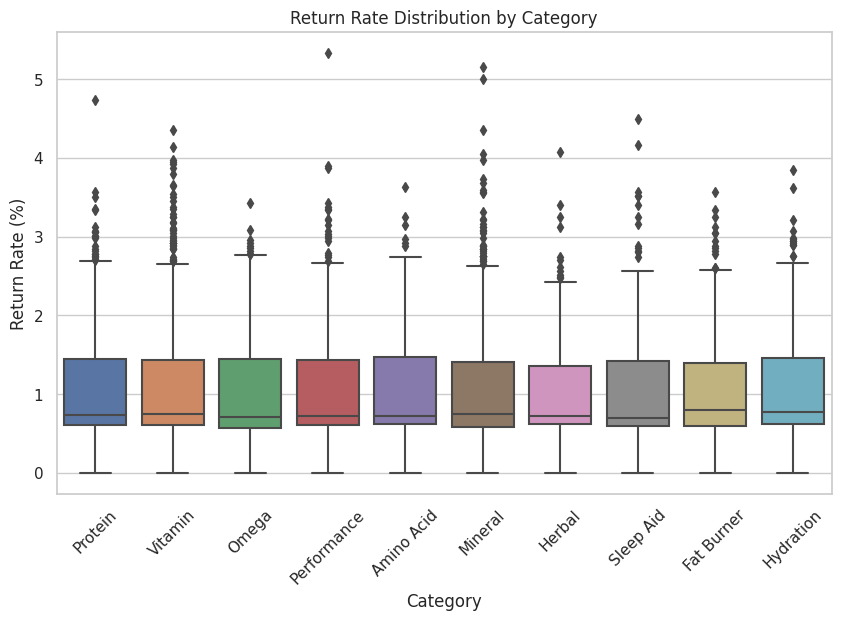

In [70]:
df['Return Rate (%)'] = (df['Units Returned'] / df['Units Sold']) * 100

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Return Rate (%)')
plt.title("Return Rate Distribution by Category")
plt.xticks(rotation=45)
plt.show()

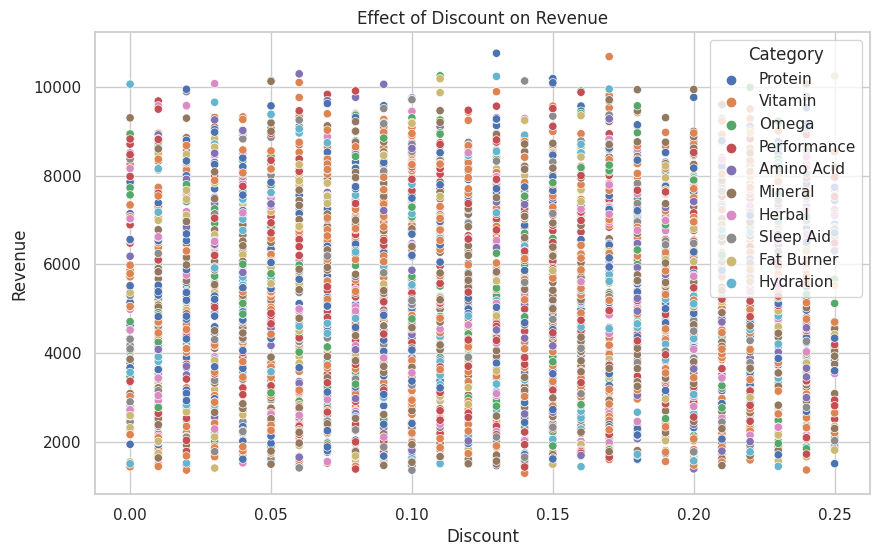

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Revenue', hue='Category')
plt.title("Effect of Discount on Revenue")
plt.show()